### IRIS Dataset for species clasification

###### Importing required Libraries

In [35]:
import numpy as np
import pandas as pd
import os

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# feature scaling
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import cross_val_score,GridSearchCV

# To divide train and test set
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA

# To build the models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# To evaluate the models
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score
from sklearn.metrics import plot_confusion_matrix


#To impute missing values
from sklearn.impute import SimpleImputer

In [2]:
from sklearn import datasets

#### Importing data from sklearn

In [3]:
data = datasets.load_iris()

In [4]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

#### Description of the Dataset

In [5]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
iris = pd.DataFrame(data['data'],columns=data.feature_names)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### Renaming the target variable Species

In [7]:
def flower_type(x):
    if x==0:
        return 'setosa'
    elif x==1:
        return 'versicolor'
    else : return 'virginica'

In [8]:
iris['species'] = pd.Series(data.target).apply(flower_type)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### Basic Summary Statistics

In [10]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

#### Exploratory data Analysis

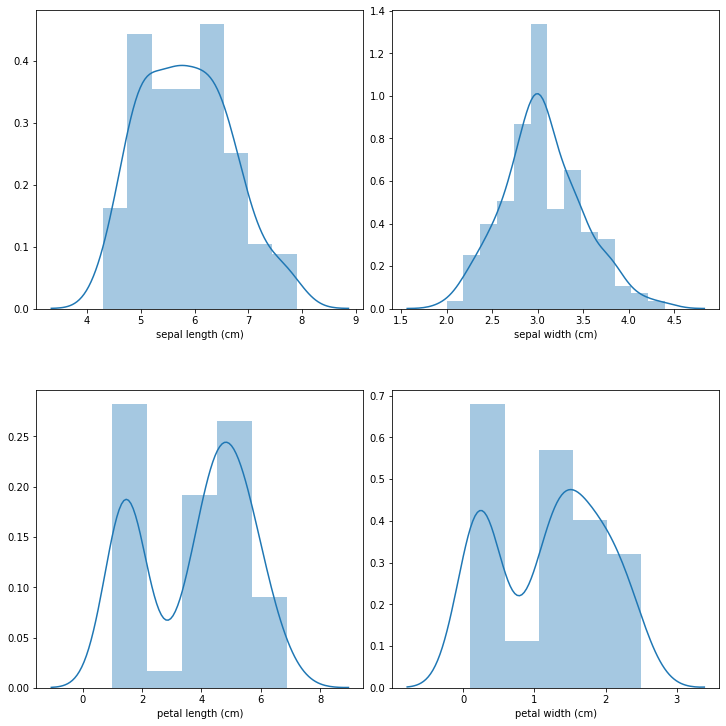

In [12]:
fig, ax = plt.subplots(2,2,figsize=(10,10))
count = 0
axs = ax.flatten()
for k,i in iris[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']].items():
    sns.distplot(i , ax = axs[count])
    count += 1
plt.tight_layout(pad = 0.4,w_pad = 0.6 , h_pad = 5.0)

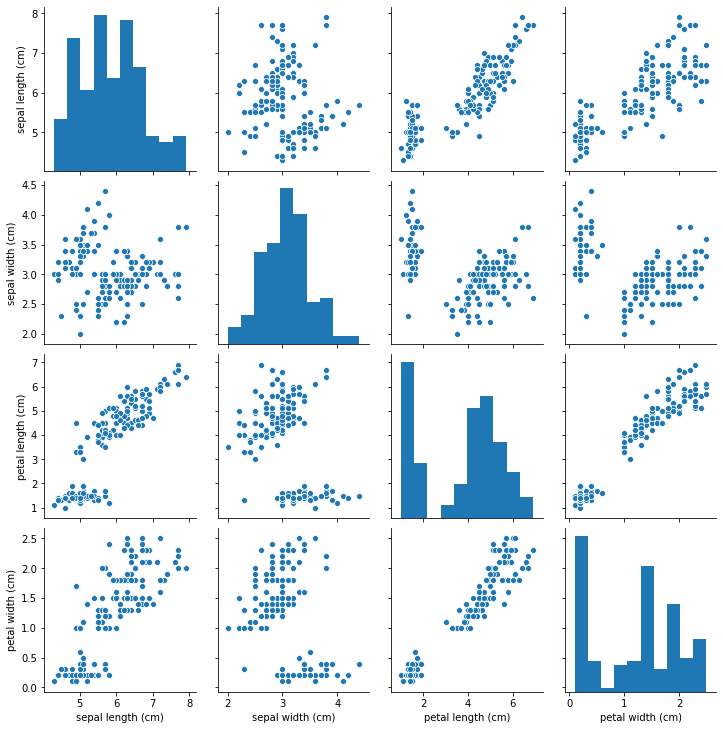

In [13]:
sns.pairplot(iris)
plt.show()

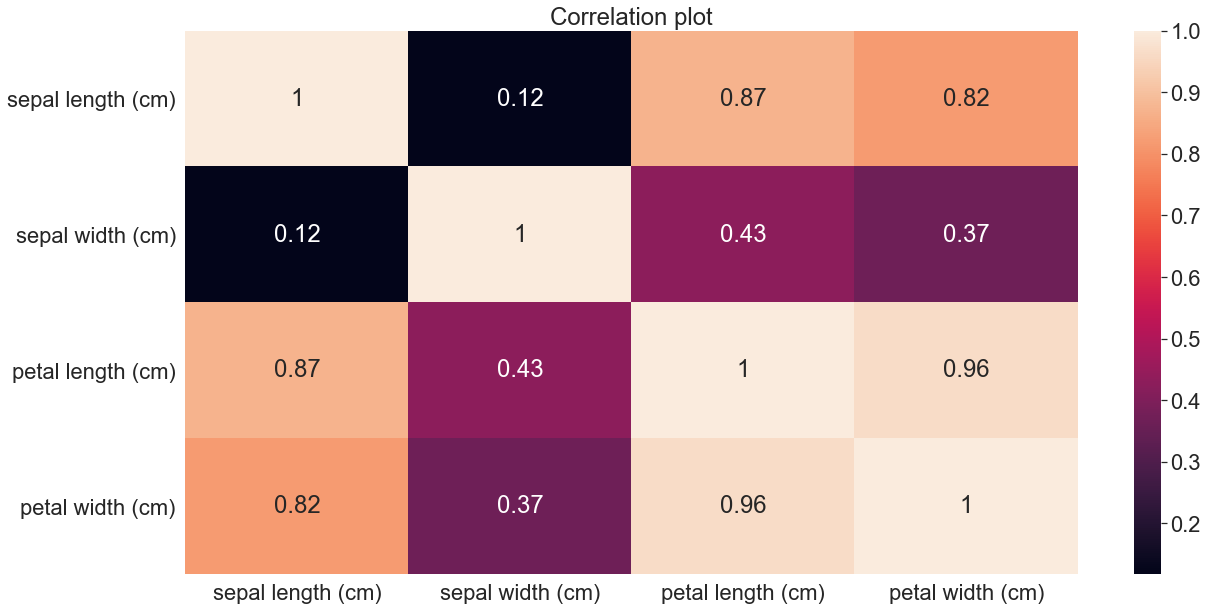

In [14]:
plt.figure(figsize=(20, 10))
sns.set_style("white")
sns.set_context("notebook",font_scale=2)
ax = sns.heatmap(iris.corr().abs(),  annot=True);
ax.set_title("Correlation plot");

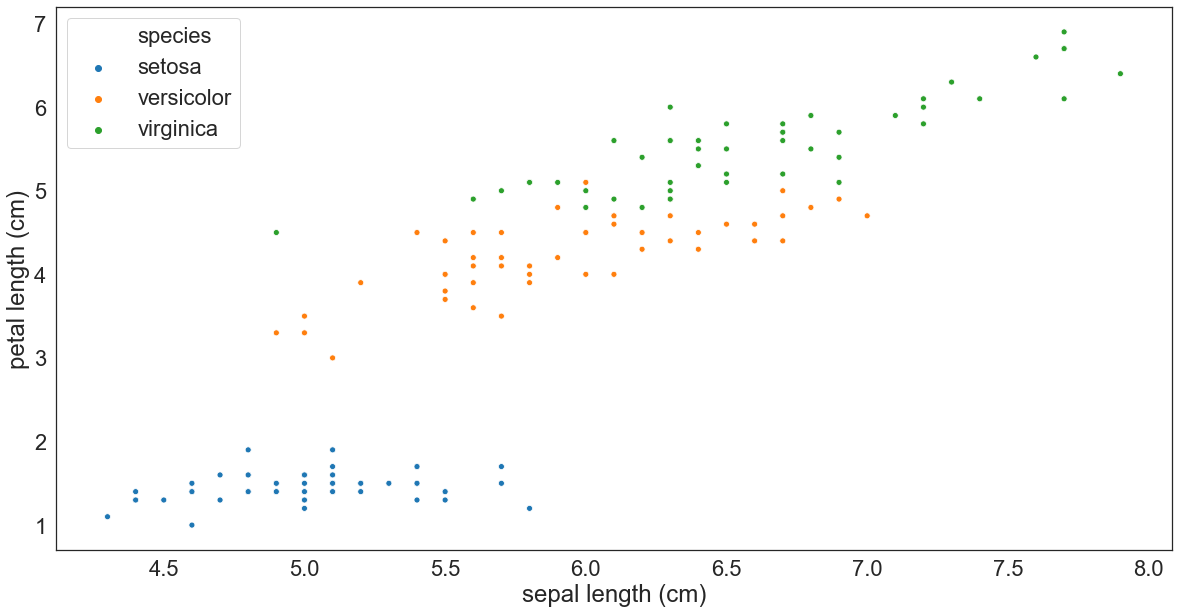

In [15]:
plt.figure(figsize=(20, 10))
sns.set_style("white")
sns.set_context("notebook",font_scale=2)
sns.scatterplot(x=iris['sepal length (cm)'],y=iris['petal length (cm)'],hue=iris['species']);

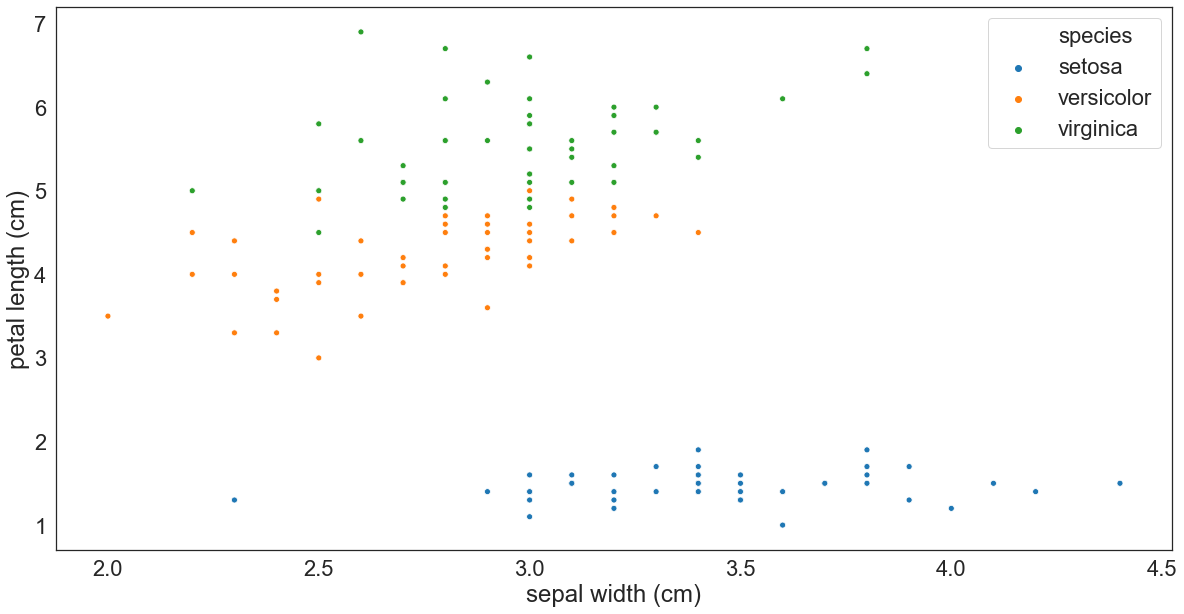

In [16]:
plt.figure(figsize=(20, 10))
sns.set_style("white")
sns.set_context("notebook",font_scale=2)
sns.scatterplot(x=iris['sepal width (cm)'],y=iris['petal length (cm)'],hue=iris['species']);

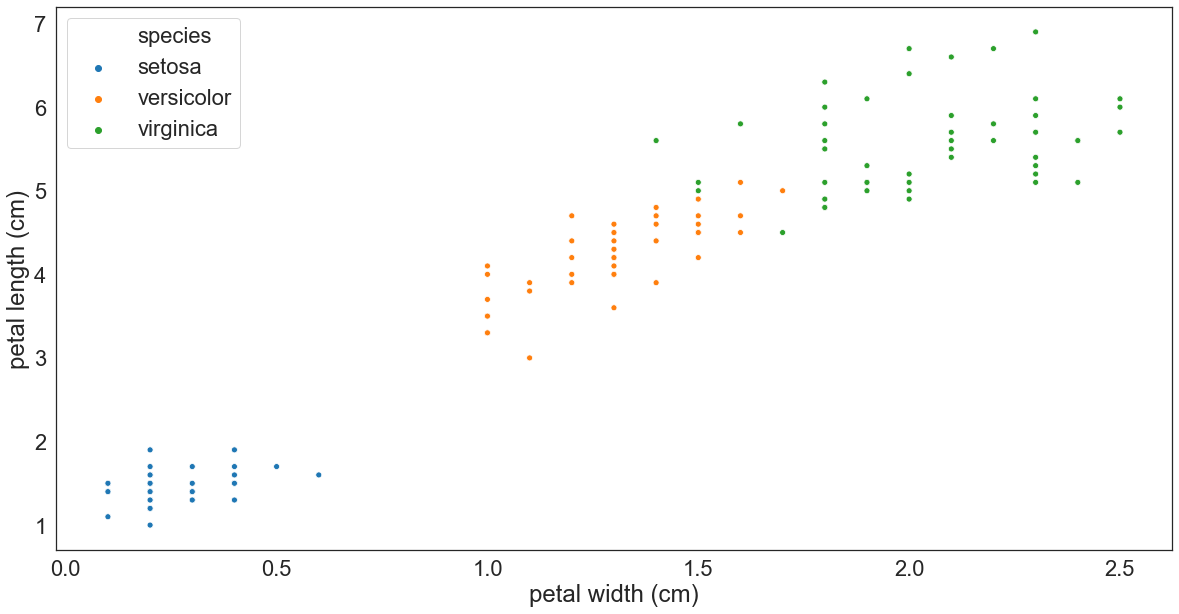

In [17]:
plt.figure(figsize=(20, 10))
sns.set_style("white")
sns.set_context("notebook",font_scale=2)
sns.scatterplot(x=iris['petal width (cm)'],y=iris['petal length (cm)'],hue=iris['species']);

### Model Building and Evaluation

### Splitting data into train and test

In [24]:
x_train = iris.drop('species', axis=1)
y_train= iris['species']

### Logistic Regression

In [25]:
logis = LogisticRegression(solver='newton-cg',multi_class='multinomial')

In [27]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [28]:
model = logis.fit(x_train,y_train)
y_pred = model.predict(x_train)

confusion = pd.DataFrame(confusion_matrix(y_train,y_pred),columns=['Pred_setosa','Pred_versicolor','Pred_virginica'],index=['Act_Setosa','Act_versicolor','Act_virginica'])
print("Confusion Matrix for Train :")
print("Accuracy for Train :",accuracy_score(y_train,model.predict(x_train)))
confusion

Confusion Matrix for Train :
Accuracy for Train : 0.9733333333333334


,Pred_setosa,Pred_versicolor,Pred_virginica
Act_Setosa,50,0,0
Act_versicolor,0,47,3
Act_virginica,0,1,49


### Naive Bayes

In [36]:
Naive = GaussianNB()
model = Naive.fit(x_train,y_train)
y_pred = model.predict(x_train)

confusion = pd.DataFrame(confusion_matrix(y_train,y_pred),columns=['Pred_setosa','Pred_versicolor','Pred_virginica'],index=['Act_Setosa','Act_versicolor','Act_virginica'])
print("Confusion Matrix for Train :")
print("Accuracy for Train :",accuracy_score(y_train,model.predict(x_train)))
confusion

Confusion Matrix for Train :
Accuracy for Train : 0.96


,Pred_setosa,Pred_versicolor,Pred_virginica
Act_Setosa,50,0,0
Act_versicolor,0,47,3
Act_virginica,0,3,47


### KNN

In [29]:
KNN = KNeighborsClassifier()
model = KNN.fit(x_train,y_train)
y_pred = model.predict(x_train)

confusion = pd.DataFrame(confusion_matrix(y_train,y_pred),columns=['Pred_setosa','Pred_versicolor','Pred_virginica'],index=['Act_Setosa','Act_versicolor','Act_virginica'])
print("Confusion Matrix for Train :")
print("Accuracy for Train :",accuracy_score(y_train,model.predict(x_train)))
confusion

Confusion Matrix for Train :
Accuracy for Train : 0.9666666666666667


,Pred_setosa,Pred_versicolor,Pred_virginica
Act_Setosa,50,0,0
Act_versicolor,0,47,3
Act_virginica,0,2,48


### Decision Tree

In [30]:
Tree = DecisionTreeClassifier()
model = Tree.fit(x_train,y_train)
y_pred = model.predict(x_train)

confusion = pd.DataFrame(confusion_matrix(y_train,y_pred),columns=['Pred_setosa','Pred_versicolor','Pred_virginica'],index=['Act_Setosa','Act_versicolor','Act_virginica'])
print("Confusion Matrix for Train :")
print("Accuracy for Train :",accuracy_score(y_train,model.predict(x_train)))
confusion

Confusion Matrix for Train :
Accuracy for Train : 1.0


,Pred_setosa,Pred_versicolor,Pred_virginica
Act_Setosa,50,0,0
Act_versicolor,0,50,0
Act_virginica,0,0,50


In [32]:
RFC = RandomForestClassifier()
model = RFC.fit(x_train,y_train)
y_pred = model.predict(x_train)

confusion = pd.DataFrame(confusion_matrix(y_train,y_pred),columns=['Pred_setosa','Pred_versicolor','Pred_virginica'],index=['Act_Setosa','Act_versicolor','Act_virginica'])
print("Confusion Matrix for Train :")
print("Accuracy for Train :",accuracy_score(y_train,model.predict(x_train)))
confusion

Confusion Matrix for Train :
Accuracy for Train : 1.0


,Pred_setosa,Pred_versicolor,Pred_virginica
Act_Setosa,50,0,0
Act_versicolor,0,50,0
Act_virginica,0,0,50


In [33]:
Feature_importance = pd.DataFrame({"Features":x.columns,"Importance":RFC.feature_importances_})
Feature_importance.sort_values(by=['Importance'],ascending=False,inplace=True)

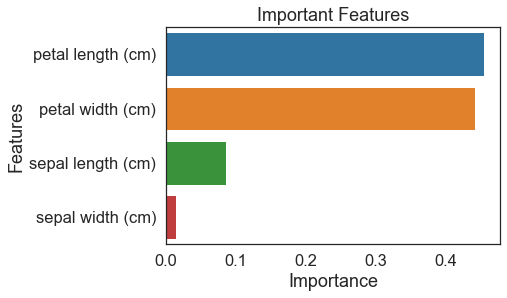

In [34]:
ax = sns.barplot(x='Importance',y='Features',data = Feature_importance);
ax.set_title("Important Features");

### Conclusion :

From the above analysis,we can clearly say that petal length and petal width are the important features to predict the species better compared to sepal features.Accuracy for logisticRegression is 97.33 % and Tree Classifier it is 100 %.